# Lexical Resources
- A lexicon is a collection of words and/or phrases along with associated information (e.g., POS and sense definitions)
- http://www.nltk.org/howto/corpus.html#word-lists-and-lexicons

<img src="./outline.png" width="300" align="left">

In [83]:
import nltk
nltk.data.path.append("/data/3/zwang/nltk_data") # setting environment variable to your path

# settings to show the plot in file
from matplotlib import pyplot as plt
plt.style.use('default')

# WordNet
In the following content, we'll briefly go over the wordnet resource.

- Lexical database for English with 155,287 words, created by Princeton University
    - official site: https://wordnet.princeton.edu
    - Wikipedia: https://en.wikipedia.org/wiki/WordNet
    - visualization: https://lexical-graph.herokuapp.com/car

- English words are grouped into "synsets" (sets of synonyms)
    - groups words based on meanings
    - synonyms: words denote the same concept and are interchangeable
        - e.g., car, bus, automobile
    - 117,659 synonym sets
    - each expressing a distinct concept
    - Synsets are interlinked by means of semantic and lexical relations
    - Rich structure makes it a useful tool for computational linguistics and NLP
 

- provides definitions, usage examples, and relations among synonym sets

## Senses and lemma
One primary use for WordNet is to determine the similarity between words' meanings.

- E.g.: 
    - Benz is credited with the invention of the car. 
    - Benz is credited with the invention of the automobile.
    - Two sentences are the same except for the last word.
    - "car" and "automobile" are synonyms, so the meaning of the two sentences are the same.

<img src="./structure.png" width="400" align="center">
<img src="./car_structure_2.png" width="600" align="center">

In [1]:
# NLTK provides direct access to this resource, which is convenient. 
from nltk.corpus import wordnet as wn

- An example of using Wordnet to determine the synsets (synonym sets) of "car"
    - online: http://wordnetweb.princeton.edu/perl/webwn

In [2]:
wn.synsets('car')
# the entry 'car.n.01' is a synset (synonym set) for the word 'car'
# a 3-part form: word.pos.number, the first sense / meaning of the word car as a noun

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

- For each synset, we can print out the **definition**
- as well as an example of **usage** in a sentence for the given word

In [3]:
# Definition of a synset
print(wn.synset('car.n.01').definition()) # try car.n.02, car.n.03

a motor vehicle with four wheels; usually propelled by an internal combustion engine


In [4]:
# Example usage of a synset:
print(wn.synset('car.n.01').examples()) # try car.n.02, car.n.03
# As we can see, not all synsets have valid examples as we obtain the empty list

['he needs a car to get to work']


- The list of lemmas for each synset

In [81]:
print(wn.synset('cable_car.n.01').lemmas()[0])
print(wn.synset('cable_car.n.01').lemmas()[1])
# eliminate ambiguity: car.n.01.automobile, car.n.01.motorcar

Lemma('cable_car.n.01.cable_car')
Lemma('cable_car.n.01.car')


- Each synonym in the above set is referred to as a **lemma**
- **lemma**: specific sense of a specific word
    - pairs a synset with a word ("car.n.01","car")
    

In [6]:
# show lemma names (synonyms for the synset )
wn.synset('car.n.01').lemma_names()
# According to WordNet, the word "auto", "automobile", "machine", "motorcar" are synonyms of the word "car"

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [7]:
# For a given lemma, we can also get the synsets corresponding to that lemma
print(wn.lemma('car.n.01.machine').synset())

Synset('car.n.01')


## Synonyms

In [11]:
word_synonyms = []
for syn in wn.synsets("car"): # iterate over the synonym sets of "car" (try "good")
    print(syn, syn.lemma_names())
#     for lm in syn.lemmas(): 
#         word_synonyms.append(lm.name()) # get the lemma name for each synonym

# print(word_synonyms)

Synset('car.n.01') ['car', 'auto', 'automobile', 'machine', 'motorcar']
Synset('car.n.02') ['car', 'railcar', 'railway_car', 'railroad_car']
Synset('car.n.03') ['car', 'gondola']
Synset('car.n.04') ['car', 'elevator_car']
Synset('cable_car.n.01') ['cable_car', 'car']
[]


In [25]:
wn.synsets("good")[1].lemmas()[0].antonyms()

[Lemma('evil.n.03.evil')]

## Antonyms 
    - relations defined over lemmas

In [45]:
word_antonyms = []

for syn in wn.synsets("good"): # iterate over the synonym sets of "good"
    for lm in syn.lemmas(): # iterate over each lemma of a given synset
        if lm.antonyms(): # find antonyms for each lemma
            print(syn,'-->', lm, '-->',lm.antonyms())
            word_antonyms.append(lm.antonyms()[0].name())

print(word_antonyms)

Synset('good.n.02') --> Lemma('good.n.02.good') --> [Lemma('evil.n.03.evil')]
Synset('good.n.02') --> Lemma('good.n.02.goodness') --> [Lemma('evil.n.03.evilness')]
Synset('good.n.03') --> Lemma('good.n.03.good') --> [Lemma('bad.n.01.bad')]
Synset('good.n.03') --> Lemma('good.n.03.goodness') --> [Lemma('bad.n.01.badness')]
Synset('good.a.01') --> Lemma('good.a.01.good') --> [Lemma('bad.a.01.bad')]
Synset('good.a.03') --> Lemma('good.a.03.good') --> [Lemma('evil.a.01.evil')]
Synset('well.r.01') --> Lemma('well.r.01.well') --> [Lemma('ill.r.01.ill')]
['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']


## Hypernym
- "a word with a **broad / general** meaning that more specific words fall under; a superordinate" 
- e.g.:
    - color is a hypernym of green
    - car is a hypernym of bus
    - cat is a hypernym of house_cat

In [37]:
print(wn.synset('house_cat.n.01').hypernyms())

[Synset('cat.n.01'), Synset('domestic_animal.n.01')]


In [38]:
print(wn.synset('bus.n.04').hypernyms())

[Synset('car.n.01'), Synset('dysphemism.n.01')]


In [52]:
# root hypernyms: the most general hypernyms
car.root_hypernyms()

[Synset('entity.n.01')]

## Hyponym
- "a word of more **specific** meaning"
- e.g.: 
    - bus is a hyponym of car
    - cat is a hyponym of animal
    - A belongs to B, A is a hyponym of B

In [40]:
# There are a few different synsets for this word
# Let us take a look at what the definition of the synset 'cat.n.01' is:
print(wn.synset('car.n.01').definition())

a motor vehicle with four wheels; usually propelled by an internal combustion engine


In [41]:
# It looks like that definition refers to ...
# Let us determine the hyponyms of the term "car", and store that into a variable `types_of_cars`
car = wn.synset('car.n.01')
types_of_cars = car.hyponyms() # specific categories of cars
types_of_cars

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [44]:
# Now, let us loop through the hyponyms and see the lemmas for each synset
for synset in types_of_cars:
    print(synset,'-->', synset.lemma_names())
#     for lemma in synset.lemmas():
#         print(lemma.name())
        
# Note that terms like "bus","taxi", "sedan", "SUV" are more specific categories of "car", they are hyponyms of "car"

Synset('ambulance.n.01') --> ['ambulance']
Synset('beach_wagon.n.01') --> ['beach_wagon', 'station_wagon', 'wagon', 'estate_car', 'beach_waggon', 'station_waggon', 'waggon']
Synset('bus.n.04') --> ['bus', 'jalopy', 'heap']
Synset('cab.n.03') --> ['cab', 'hack', 'taxi', 'taxicab']
Synset('compact.n.03') --> ['compact', 'compact_car']
Synset('convertible.n.01') --> ['convertible']
Synset('coupe.n.01') --> ['coupe']
Synset('cruiser.n.01') --> ['cruiser', 'police_cruiser', 'patrol_car', 'police_car', 'prowl_car', 'squad_car']
Synset('electric.n.01') --> ['electric', 'electric_automobile', 'electric_car']
Synset('gas_guzzler.n.01') --> ['gas_guzzler']
Synset('hardtop.n.01') --> ['hardtop']
Synset('hatchback.n.01') --> ['hatchback']
Synset('horseless_carriage.n.01') --> ['horseless_carriage']
Synset('hot_rod.n.01') --> ['hot_rod', 'hot-rod']
Synset('jeep.n.01') --> ['jeep', 'landrover']
Synset('limousine.n.01') --> ['limousine', 'limo']
Synset('loaner.n.02') --> ['loaner']
Synset('minicar.n.

## Hypernym VS hyponym
- A hypernym goes upward toward more generality;
- A hyponym drills down to more specificity; 
    
- E.g.:
    - color is a hypernym of green; green is a hyponym of color
    - car is a hypernym of bus; bus is a hyponym of car
    - cat is a hypernym of house_cat; house_cat is a hyponym of cat
    

<img src="./hyper_hypo.png" width="300" align="center">

## Semantic similarity
**How related / similar are two words?**
 
- assign a score based on the distance in terms of hypernyms and hyponyms
- how many levels up or down is a given word from the other we are attempting to compare it to.

- A few ways to calculate the similarities between words:
    - **path_similarity**: a score denoting how similar two words are in terms of the distance between hypernyms/hyponyms
    - a score between 0 and 1 
        - 0: no similarity between the hypernym/hyponym tree
        - 1: the node which houses both of the words in terms of hypernyms/hyponyms is identical

In [46]:
# calculate the similarity between "car" and "automobile"

# First, define the synsets for these terms:
car = wn.synset('car.n.01')
automobile = wn.synset('automobile.n.01')
cat = wn.synset('cat.n.01')

In [47]:
# call the path_similarity function
print(car.path_similarity(automobile))

# We see that "car" and "automobile" have the highest similarity score of 1.0.
# This makes sense, since if we print out the synsets of "car", we see that one of the synonyms is indeed "automobile".
# print(car.lemma_names())

1.0


In [48]:
# Let us now take a look at the term "car" and "boat":
boat = wn.synset('boat.n.01')
print(car.path_similarity(boat))

# a lower score

0.125


- the traversal (with respect to hypernyms/hyponyms) from car to boat is less similar than from car to automobile

In [49]:
car.path_similarity(cat)

0.05555555555555555

In [71]:
for path in wn.synset('car.n.01').hypernym_paths():
    print(path,'\n')

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('container.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')] 

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('conveyance.n.03'), Synset('vehicle.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')] 



In [72]:
for path in wn.synset('automobile.n.01').hypernym_paths():
    print(path,'\n')

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('container.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')] 

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('conveyance.n.03'), Synset('vehicle.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')] 



In [74]:
for path in wn.synset('cat.n.01').hypernym_paths():
    print(path,'\n')

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('animal.n.01'), Synset('chordate.n.01'), Synset('vertebrate.n.01'), Synset('mammal.n.01'), Synset('placental.n.01'), Synset('carnivore.n.01'), Synset('feline.n.01'), Synset('cat.n.01')] 



- More ways to define distances between words:
    - Wu-Palmer Similarity
    - Resnik Similarity
    - Jiang-Conrath Similarity
    - Lin Similarity

- based on different metrics of what one uses to define similarity between two different words. 

In [50]:
# Going over each of these methods in detail would go beyond the scope of this tutorial, 
# but let us look at the Wu-Palmber similarity metric.


# The numerics obtained from this method may appear to be more intuitively pleasing than the `path_similarity` method.

# Use it in the same way as `path_similarity` function
print(car.wup_similarity(automobile))
# We get the highest similarity score of 1.0

# Let us now try this metric with "car" and "boat":
print(car.wup_similarity(boat))
# A bit higher than using "path_similarity", as boat and car are both modes of transport, but they are still different.


# Check the similarity between car and cat
cat = wn.synset('cat.n.01')
print(car.wup_similarity(cat))
# Much lower score, as "car" and "cat" are seemingly unrelated

1.0
0.6956521739130435
0.32


# Wordlist corpora  
- http://www.nltk.org/nltk_data/

In [84]:
def unusual_words(text):
    """
    unusual words: words appear in the given text but not in english vocabulary
    """
    # build vocabulary for text
    # w.isalpha(): returns "True" if all characters in the string are alphabets, Otherwise, "False"
    text_vocab = set(w.lower() for w in text if w.isalpha()) 

    # vocabulary of english words
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    
    # words appear in text but not in english vocabulary as unusual words
    unusual = text_vocab - english_vocab
    
    return sorted(unusual)

In [ ]:
# unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:10]

In [85]:
unusual_words(nltk.corpus.nps_chat.words())[:10]

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams']

- stopwords
    - high-frequency words (e.g., "the", "to", "also") 
    - little lexical content
    - filter out before further processing

In [86]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [87]:
def nonstopwords_fraction(text):
    """
    compute what fraction of words in a text are not stopwords
    """ 
    stopwords = nltk.corpus.stopwords.words('english')
    nonstopwords = [w for w in text if w.lower() not in stopwords]
    
    return len(nonstopwords) / len(text)

In [88]:
# 73.5% non-stopwords; 26.5% stopwords; formal news report, more informative
nonstopwords_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [89]:
# 71% non-stopwords; 29% stopwords; non-formal oral text, less informative
nonstopwords_fraction(nltk.corpus.nps_chat.words())

0.7097978227060653

## Solving the word puzzles
- application of wordlist

- word puzzle problem:
    - creating words using a grid of letters 
    - requirements:
        - new words must contain more than 5 letters from the grid
        - each new word must contain the center letter 
        - each letter can only be used once for creating each new word 
            - repeat letters: the frequency of each letter in the candidate word less than or equal to the frequency of the corresponding letter in the puzzle
        - no person names
        - e.g., region, vov, govern, involver?
        
<img src="./puzzle.png" width="100" align="center">

In [90]:
def solve_puzzle(puzzle_letters, obligatory_letter, min_len):
    """
    generate new words using letters from the grid  
    follow the required rules:
        - word length > 5
        - must contain the obligatory letter
        - each letter can only be used once: the frequency of every letter <= puzzle letters
        - no human names
    """
    wordlist = nltk.corpus.words.words() # list of english words
    
    new_words = []
    for w in wordlist:
        if((len(w) > min_len) and (obligatory_letter in w) and (nltk.FreqDist(w) <= nltk.FreqDist(puzzle_letters))):
            # no female / male names
            names = [n.lower() for n in nltk.corpus.names.words('male.txt') + nltk.corpus.names.words('female.txt')]
            if(w not in names):
                new_words.append(w)
    
    print("Generated %d new words" % len(new_words))
    return new_words

In [91]:
solve_puzzle(puzzle_letters = 'egivrvonl', obligatory_letter='r', min_len=5)

Generated 19 new words


['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

- Compare the differences of female and male names by ending letters

In [92]:
# get names from nltk
# get names from online resources

male_names = nltk.corpus.names.words('male.txt')
female_names = nltk.corpus.names.words('female.txt')
names = male_names + female_names
shared_names = list(set(male_names).intersection(set(female_names))) # names share by girls and boys
print("%d female names, %d male names, %d shared names" % (len(female_names), len(male_names), len(shared_names)))

5001 female names, 2943 male names, 365 shared names


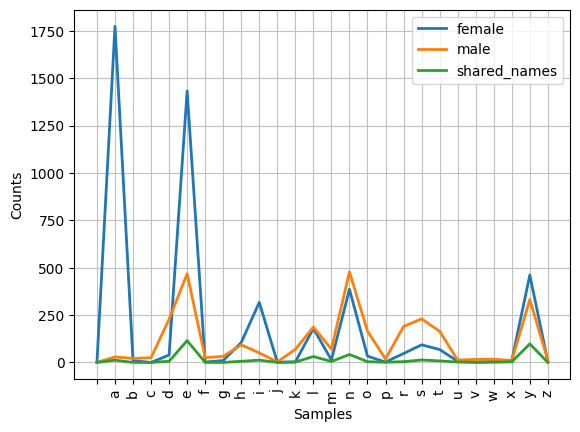

In [93]:
# ending letter in female and male names    
name_gender = []
for name in set(names):
    if(name in shared_names):
        name_gender.append(('shared_names',name[-1]))
        name_gender.append(('female',name[-1]))
        name_gender.append(('male', name[-1]))
    elif(name in male_names):
        name_gender.append(('male', name[-1]))
    elif(name in female_names):
        name_gender.append(('female', name[-1]))
    else:
        print("Error: %s" % name)
        
cfd = nltk.ConditionalFreqDist(name_gender)

cfd.plot()
# names ending in a and e are more likely to be female names
# names ending in n and s are more likely to be male names
# names ending in l,n, and y are more likely to be shared names

## A pronouncing dictionary 
- CMU Pronouncing Dictionary for US English
- word: phonetic codes

In [94]:
entries = nltk.corpus.cmudict.entries()
print(len(entries))

entries[42371:42379]

133737


[('fir', ['F', 'ER1']),
 ('fire', ['F', 'AY1', 'ER0']),
 ('fire', ['F', 'AY1', 'R']),
 ('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M']),
 ('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M']),
 ('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z']),
 ('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z']),
 ('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])]

## Comparative wordlists
- Swadesh wordlists
- 207 common words in 24 languages

In [95]:
from nltk.corpus import swadesh
print("languages:", swadesh.fileids())

languages: ['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [96]:
swadesh.words('en')[:10]

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there']

In [97]:
en2fr = swadesh.entries(['en', 'fr'])
en2fr[:10]

[('I', 'je'),
 ('you (singular), thou', 'tu, vous'),
 ('he', 'il'),
 ('we', 'nous'),
 ('you (plural)', 'vous'),
 ('they', 'ils, elles'),
 ('this', 'ceci'),
 ('that', 'cela'),
 ('here', 'ici'),
 ('there', 'là')]

In [98]:
translate = dict(swadesh.entries(['en', 'fr']))
translate['dog'], translate['here']

('chien', 'ici')